Lets start with importing necessary libraries and dataset.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [58]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


As we have 185 null values in "Discounts and Offers", we need to fill them with Mean value(because discounts may affect the amount of revenue and total cost in upcoming methods
)

In [59]:
# convert "Order Date and Time" and "Delivery Date and Time" to date/time format
from datetime import datetime

#convert date and time columns to date/time format
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


A typeError to fix


In [60]:
# # convert "Discounts and Offers" to a consistent numeric value OR Calculate the discount amounts.
# #  Creating a function to extract numeric values from the discounts and offers
# def extract_discount(discount_str):
#     if 'off' in discount_str:
#         # fixed amount off
#         return float(discount_str.split(''[0]))
#     elif '%' in discount_str:
#         # percentage off
#         return float(discount_str.split('%'[0]))
#     else:
#         # no discount
#         return 0.0

# #apply the function to create a new "Discount Value" column
# food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x:extract_discount(x))

# # for percentage discounts, calculating the amounts based on the order values
# food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value']*['Discount Percentage']/100)
#                                                    if x['Discount Percentage'] >1
#                                                    else x['Discount Percentage'], axis = 1)
# # adjust 'Discount Amount' for fixed discount direct;y specified in the 'Discounts and Offers' Column
# food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage']<=1
#                                                    else x [ 'Order Value']*x['Discount Percentage']/100, axis= 1)

# food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes

In [37]:

# Convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])


# Function to convert discount strings to numerical values
def extract_discount(discount_str):
    if pd.isna(discount_str):
        return 0.0  # Return 0 for missing values
    try:
        if '%' in discount_str:
            return float(discount_str.strip('%').split()[0]) / 100
        else:
            return float(discount_str.strip().split()[0]) / 100
    except ValueError:
        return 0.0  # Return 0 for invalid discount formats

# Apply the function to create a new "Discount Percentage" column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(extract_discount)

# Calculate the discount amounts proportional to the "Order Value" column
food_orders['Discount Amount'] = food_orders['Order Value'] * food_orders['Discount Percentage']

# Display the result
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']])


     Order Value Discounts and Offers  Discount Percentage  Discount Amount
0           1914            5% on App                  0.0              0.0
1            986                  10%                  0.1             98.6
2            937         15% New User                  0.0              0.0
3           1463                  NaN                  0.0              0.0
4           1992         50 off Promo                  0.5            996.0
..           ...                  ...                  ...              ...
995          825            5% on App                  0.0              0.0
996         1627                  NaN                  0.0              0.0
997          553                  NaN                  0.0              0.0
998         1414         15% New User                  0.0              0.0
999         1657         15% New User                  0.0              0.0

[1000 rows x 4 columns]


In [38]:
food_orders['Discount Amount'].sum()

134570.5

In [39]:
food_orders['Delivery Fee'].sum()


28620

In [40]:
food_orders['Payment Processing Fee'].sum()


29832

In [41]:
food_orders["Order Value"].sum()

1053969

**Cost and Profitability Analysis**

Considering:
1) Delivery Fee
2) Payment process Fee
3) Discount Amount

In [42]:
# Calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee']  + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# Aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print (overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 193022.5, 'Total Profit': -66032.5}


Based on the analysis:

Total no.of orders: 1,000

Total Revenue (Commission Fees only): 1,26,990

Total Cost: 1,93,022.5(including delivery fees, payment processing fees, and discounts)

Total Profit: **-6032**

**The Analysis shows that the Total Costs associated with Food delivery operations exceeded the total revenue generated. It resulted in a Net Loss**

**So it is emminent that the current commission rates , delivery fees, discount strategies are not sustainable enough to get profit to the company**


So lets get a basic understanding on distribution of costs, revenue and profit


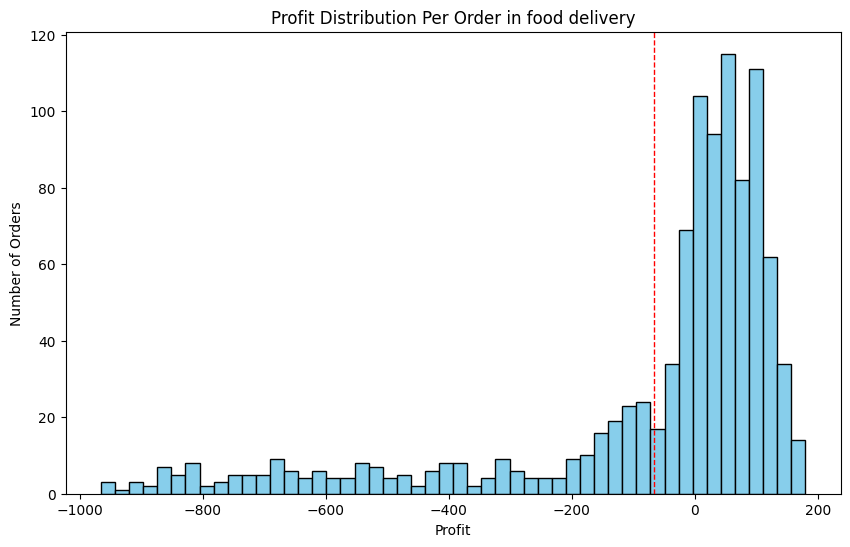

In [43]:
# Matplotlib has been already installed as plt

# histogram of profits per order
plt.figure(figsize=(10,6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution Per Order in food delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

A noticeable number of orders are resulting in loss(below 0).

The Red dashed line denoted the average profit, which is highlighting the overall loss-making situation

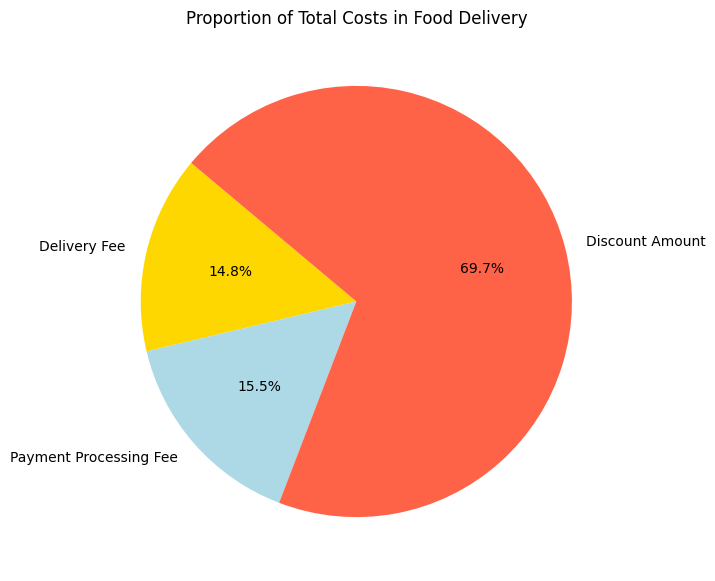

In [46]:
# To see the proportion of the total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7,7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'tomato'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

From the pie, we can see that Discounts constitute a significant portion of the cossts, suggesting that promotional strategies might be heavily impacting overall profitability.

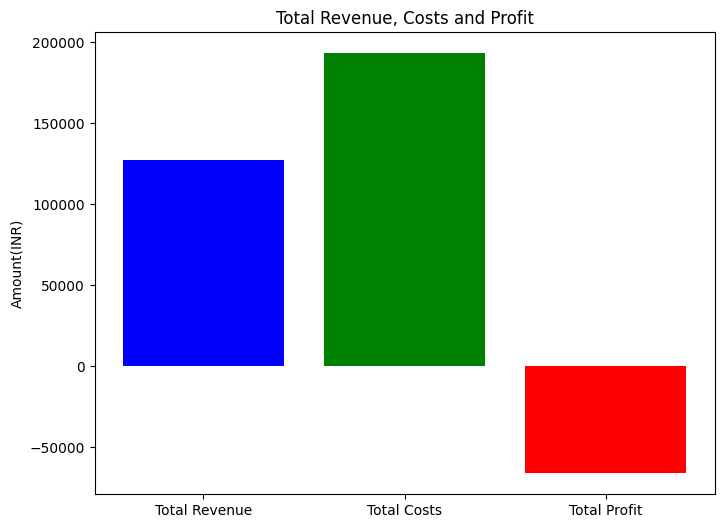

In [48]:
# Lets compare Total Revenue, Total Costs and Total Profit(net loss)

# bar chart for total revenue, costs, profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue,total_costs,total_profit]

plt.figure(figsize=(8,6))
plt.bar(totals, values, color=[ 'blue','green','red' ])
plt.title('Total Revenue, Costs and Profit')
plt.ylabel('Amount(INR)')
plt.show()

The bar chart represents the gap btween revenue and costs. Clearly stating that the costs surpass the revenue, leading a total loss.

______________________________________________________________________________________________________________________________
-------------------------------------------------------------------------------------------------------------------------------
_______________________________________________________________________________________________________________________________

***New Strategy for Profits***

--> The analysis infers that the discounts on food orders are resulting in huge losses. So we need to find a new strategy for profitability.

Specifically, we need look for:

1) A new average commission percentage based on profitablle orders.
2) A new average discount percentage for profitable arders, that could serve as a guideline for what level of discount still allows for profitability.


**Let's calculate:**

*1) The Average commission percentage for profitable orders*
*2) The average dicount percentage for profitable orders*

In [49]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit']>0]

# calculate thethe average commmission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/profitable_orders['Order Value']) *100

# calculate thethe average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount']/profitable_orders['Order Value']) *100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

24.350864186867078 1.9867549668874172


C:\Users\Asus\AppData\Local\Temp\ipykernel_12000\3826945855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/profitable_orders['Order Value']) *100
C:\Users\Asus\AppData\Local\Temp\ipykernel_12000\3826945855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount']/profitable_orders['Order Value']) *100


Based on the analysis of profitable orders, we found some "Sweet Spots" which are the new set of averages for commission and discount percentage:

**New Average Commission Percentage: 24.35%**
**New Average Discount Percentage: 1.98%**


*The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability.*



**Based on this analysis, a strategy that aims for a commission rate closer to 24% and a discount rate around 2% could potentially improve profitability across the board.**

*Let's visualize the a comparison of profitability using actual versus recommended discounts and commisssionsacross all orders.*

1) Calculate the profitability per order using the actual discounts and commissions already present in the dataset.

2) Simulate profitability per order using the recommended discounts (2%) and commissions (24%) to see the potential impact on profitability.

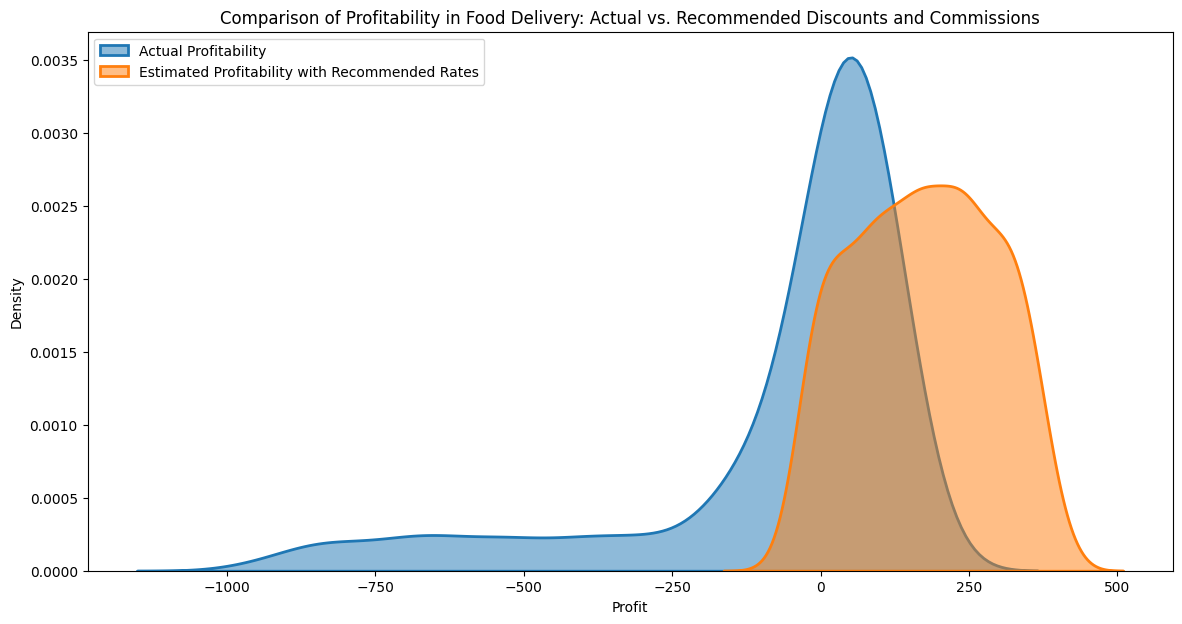

In [50]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 24.0  # 24%
recommended_discount_percentage = 2.0    # 2%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

**The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (2%) and commissions (24%).**


Note: The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses(profit<0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.